In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv("spotify_tracks_with_metadata_10000.csv")
df_original=df
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         10000 non-null  object 
 1   artist             10000 non-null  object 
 2   genre              10000 non-null  object 
 3   playlist_category  10000 non-null  object 
 4   danceability       10000 non-null  float64
 5   energy             10000 non-null  float64
 6   valence            10000 non-null  float64
 7   tempo              10000 non-null  float64
 8   duration_ms        10000 non-null  int64  
 9   popularity         10000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


(10000, 10)

In [21]:
le = LabelEncoder()
df["artist_encoded"] = le.fit_transform(df["artist"])

print(df[["artist", "artist_encoded"]])

          artist  artist_encoded
0     Artist_464             405
1     Artist_221             136
2     Artist_357             286
3     Artist_389             321
4     Artist_451             391
...          ...             ...
9995   Artist_76             474
9996  Artist_230             146
9997  Artist_265             184
9998   Artist_82             481
9999  Artist_177              86

[10000 rows x 2 columns]


In [22]:
le = LabelEncoder()
df["genre_encoded"] = le.fit_transform(df["genre"])

print(df[["genre", "genre_encoded"]])

          genre  genre_encoded
0     Classical              1
1     Bollywood              0
2          Jazz              6
3           Pop              7
4           EDM              3
...         ...            ...
9995  Classical              1
9996       Rock              8
9997        Pop              7
9998       Jazz              6
9999      Indie              5

[10000 rows x 2 columns]


In [23]:
le = LabelEncoder()
df["playlist_category_encoded"] = le.fit_transform(df["playlist_category"])

print(df[["playlist_category", "playlist_category_encoded"]])

     playlist_category  playlist_category_encoded
0                Chill                          0
1             Romantic                          3
2                Sleep                          4
3              Workout                          6
4              Workout                          6
...                ...                        ...
9995            Travel                          5
9996             Chill                          0
9997             Party                          2
9998             Party                          2
9999          Romantic                          3

[10000 rows x 2 columns]


In [24]:
print(df)

            track_name      artist      genre playlist_category  danceability  \
0             Love Sky  Artist_464  Classical             Chill         0.375   
1           Fire Dream  Artist_221  Bollywood          Romantic         0.951   
2          Light Night  Artist_357       Jazz             Sleep         0.732   
3      Love Wave Night  Artist_389        Pop           Workout         0.599   
4           Fire Light  Artist_451        EDM           Workout         0.156   
...                ...         ...        ...               ...           ...   
9995    Beat Sky Night   Artist_76  Classical            Travel         0.858   
9996    Sky Night Fire  Artist_230       Rock             Chill         0.898   
9997         Fire Beat  Artist_265        Pop             Party         0.947   
9998  Heart Love Dream   Artist_82       Jazz             Party         0.397   
9999  Wave Night Heart  Artist_177      Indie          Romantic         0.217   

      energy  valence   tem

In [25]:
df= df.drop(['track_name','playlist_category','genre','artist','playlist_category_encoded','genre_encoded','artist_encoded','duration_ms','popularity'], axis=1)

In [26]:
print(df)

      danceability  energy  valence   tempo
0            0.375   0.374    0.730  149.34
1            0.951   0.333    0.185  124.30
2            0.732   0.176    0.347  195.03
3            0.599   0.607    0.663   90.66
4            0.156   0.477    0.482  142.30
...            ...     ...      ...     ...
9995         0.858   0.877    0.952  165.56
9996         0.898   0.047    0.748  167.03
9997         0.947   0.304    0.019   97.74
9998         0.397   0.443    0.401  120.80
9999         0.217   0.172    0.257  128.24

[10000 rows x 4 columns]


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
# code the scaling keeo the numbers in range

In [28]:
#elbow method to find optimal number of clusters - the number is where the WCSS / line starts to diminish
wcss = [] # within cluster sum of squares

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)


[39999.999999999956, 32496.130170808756, 28002.826441213692, 24393.95682319782, 21667.590817679225, 19610.369085690785, 17636.650264316046, 15731.011904774532, 14863.688445716361]


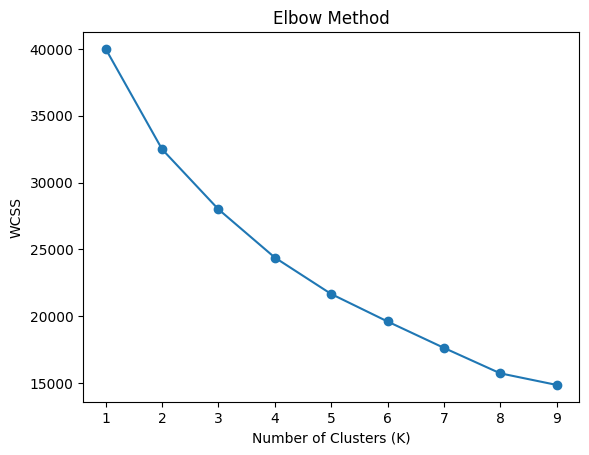

In [29]:
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # number of clusters, state nad init
kmeans.fit(X_scaled)
labels = kmeans.labels_
print(labels) #labels for the clusters
centroids = kmeans.cluster_centers_ # get the centroids center value by mean
print(centroids)
centroids_original = scaler.inverse_transform(centroids)
df['cluster']=labels # add the cluster labels to the dataframe
print(centroids_original)

[1 0 1 ... 0 0 0]
[[ 0.08530352 -0.7326966  -0.88230161 -0.54208343]
 [-0.07261699 -0.78047112  0.75784052  0.63802685]
 [-0.0216288   0.62635177  0.61611339 -0.90040255]
 [ 0.01506745  0.83503869 -0.54354077  0.73687068]]
[[  0.51869198   0.2925804    0.24703776 107.88866356]
 [  0.47327091   0.27876036   0.71737334 155.6326466 ]
 [  0.48793613   0.68572096   0.67673094  93.39206786]
 [  0.4984907    0.74608915   0.34418256 159.63159302]]


In [31]:
#danceability	energy	valence	tempo
cluster_names = {0: "Chill & Melancholic", 1: "Feel-Good Grooves", 2: "Uplifting & Energetic", 3: "Intense & Fast-Paced"}
# assign names to clusters based on centroids
df['cluster_name'] = df['cluster'].map(cluster_names) # give cluster names for each row
print(df)

      danceability  energy  valence   tempo  cluster           cluster_name
0            0.375   0.374    0.730  149.34        1      Feel-Good Grooves
1            0.951   0.333    0.185  124.30        0    Chill & Melancholic
2            0.732   0.176    0.347  195.03        1      Feel-Good Grooves
3            0.599   0.607    0.663   90.66        2  Uplifting & Energetic
4            0.156   0.477    0.482  142.30        1      Feel-Good Grooves
...            ...     ...      ...     ...      ...                    ...
9995         0.858   0.877    0.952  165.56        2  Uplifting & Energetic
9996         0.898   0.047    0.748  167.03        1      Feel-Good Grooves
9997         0.947   0.304    0.019   97.74        0    Chill & Melancholic
9998         0.397   0.443    0.401  120.80        0    Chill & Melancholic
9999         0.217   0.172    0.257  128.24        0    Chill & Melancholic

[10000 rows x 6 columns]


In [32]:
print(df['cluster'].value_counts())

cluster
3    2578
1    2558
2    2507
0    2357
Name: count, dtype: int64


In [43]:
new_customer = [[0.375,0.87,0.730,149.34]]
new_customer_slaced = scaler.transform(new_customer)
predict_cluster=kmeans.predict(new_customer_slaced)[0]
print(predict_cluster)

3


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
df[['track_name','playlist_category','genre','artist','playlist_category_encoded','genre_encoded','artist_encoded','duration_ms','popularity']] = df_original[['track_name','playlist_category','genre','artist','playlist_category_encoded','genre_encoded','artist_encoded','duration_ms','popularity']]

In [46]:
recommended_songs = df[df["cluster"] == predict_cluster].sample(5)
print(recommended_songs)

      danceability  energy  valence   tempo  cluster          cluster_name  \
8679         0.144   0.798    0.174  133.75        3  Intense & Fast-Paced   
3639         0.208   0.688    0.192  173.85        3  Intense & Fast-Paced   
8955         0.323   0.902    0.054  155.61        3  Intense & Fast-Paced   
4970         0.475   1.000    0.254  193.25        3  Intense & Fast-Paced   
6194         0.692   0.994    0.149  178.64        3  Intense & Fast-Paced   

            track_name playlist_category    genre      artist  \
8679         Fire Love             Sleep    Indie  Artist_455   
3639   Light Dance Sky             Sleep  Hip-Hop   Artist_78   
8955   Heart Beat Fire             Party  Country  Artist_415   
4970  Night Beat Light             Focus     Rock  Artist_405   
6194        Night Wave            Travel      Pop  Artist_145   

      playlist_category_encoded  genre_encoded  artist_encoded  duration_ms  \
8679                          4              5             39